<a href="https://colab.research.google.com/github/cynthiatcelorio/ML_Clustering/blob/main/cynthia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install clustimage

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 3.8 MB/s 
     |████████████████████████████████| 296 kB 9.2 MB/s 
     |████████████████████████████████| 1.1 MB 41.0 MB/s 
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7096 sha256=a5587834087b5fbc54b3c5c8eec92589d7c0d6d9dea39f786b3aa2976410b152
  Stored in directory: /root/.cache/pip/wheels/06/b2/e0/b239bd2c0ff89b98c4f0c86a63e7059f38a8dfaf6df2641c63
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=85d8e649380d46a543dd9e0d60d4bcfe03f57352288cb0c234d92a990f493284
  Stored in directory: /root/.cache/pip/wheels/a9/3a/67/06a8950e053725912e6a8c42c4a3a241410f6487b8402542ea
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55513 sha256=84271ba2b8efd87c9683d1f62d6d611123951ee419f5da3ce1b8e85e2ba68a02
  Stored in directory: /root/.cache/pip/w

In [2]:
# librerias
from glob import glob
import matplotlib.pyplot as plt
from skimage import color
from skimage.color import rgb2gray
from skimage.io import imshow, imread
from clustimage import Clustimage
import numpy as np


import cv2
from natsort import natsorted 
from skimage import io

In [3]:
!git clone "https://github.com/cynthiatcelorio/ML_Clustering_Data.git"

ruta_train = "/content/ML_Clustering_Data/train"
ruta_test = "/content/ML_Clustering_Data/test"
imagenes_numeros = "/content/ML_Clustering_Data/numeros"              # Esto lo pongo para previamente subir imagenes de numeros para después eliminarlos de las cartas

Cloning into 'ML_Clustering_Data'...
remote: Enumerating objects: 8163, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 8163 (delta 1), reused 0 (delta 0), pack-reused 8156
Receiving objects: 100% (8163/8163), 149.93 MiB | 25.87 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Checking out files: 100% (8154/8154), done.


In [4]:
# Creamos un array con las rutas de las difetentes imágenes ordenadas alfabéticamente

train_images = glob('/content/ML_Clustering_Data/train/*')                
train_images = natsorted(train_images)

In [5]:
# Creamos un array para guardar los números que corresponden a las imágenes en orden alfabético (guardar el id) (para poder crear la submission)
import glob, os

train_img_num = []

for file in glob.glob('/content/ML_Clustering_Data/train/*.jpg'):
    file = os.path.basename(file)
    file = file[:-4]
    train_img_num.append(file) 

train_img_num = natsorted(train_img_num)

In [6]:
# Comprobamos que coinciden los numeros con el nombre de la imagen 

print(train_images[7888])
print(train_img_num[7888])

/content/ML_Clustering_Data/train/8154.jpg
8154


### Preprocesamiento de las imágenes (NO ENTRES AQUÍ, DANI, ESTÁ FEO)

Antes de extraer características de las imágenes, tenemos que llevar a cabo un preprocesamiento para poder comparar las imágenes en lo referente a color y valor.

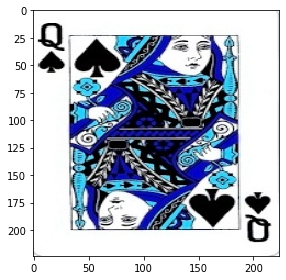

In [ ]:
import cv2

# Cargar dataset
images_entrenamiento = []

for i in range(0, len(train_images)):
    img = cv2.imread(train_images[i]) 
     
    images_entrenamiento.append(img)

io.imshow(images_entrenamiento[88])

La librería Clustimage cuenta con una función *imread* que premite escalar las imagenes a una dimensión concreta y pasarlas a escala de grises asignando al parámetro *colorscale* el valor 0.

In [ ]:
'''
# Inicializar
cl = Clustimage()

# Cargar dataset
images_entrenamiento = []

for i in range(0, len(train_images)):
    img = cl.imread(train_images[i], dim=(128, 128), colorscale=0, flatten=True)
    images_entrenamiento.append(img)


img = cl.imread(train_images[1980], dim=(128, 128), colorscale=1, flatten=True)

print(img)


# proximo objetivo: plottear como 9 a la vez, mirar por algun lado
plt.figure()
plt.imshow(img.reshape(128,128,3))
plt.axis('off')'''

[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> filepath is set to [/tmp/clustimage]


"\nimg = cl.imread(train_images[1980], dim=(128, 128), colorscale=1, flatten=True)\n\nprint(img)\n\n\n# proximo objetivo: plottear como 9 a la vez, mirar por algun lado\nplt.figure()\nplt.imshow(img.reshape(128,128,3))\nplt.axis('off')"

In [ ]:
# Hacemos dos clusters con SKMEANS  (?) y así lo separamos mayoritariamente entre el fondo de la carta y el dibujo

img = images_entrenamiento[7]

img2 = img.reshape((-1, 3))
img2 = np.float32(img2)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

# Clusters
k=2

attempts = 10
ret,label,center=cv2.kmeans(img2, k, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)
from sklearn.cluster import KMeans

center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))
cv2.imwrite("aaaa.jpg", res2)

io.imshow(res2)

### Preprocesamiento de las imágenes (Este está "mejor hecho") (Da menos problemas)

In [7]:
!pip install imutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
from imutils import paths
import cv2

imagePaths = list(paths.list_images(ruta_train))          # lista de las rutas de cada imagen (vamos, de cada imagen)
imagePaths = natsorted(imagePaths)                        # Ordenamos alfabeticamente

In [9]:
# Creamos un array para guardar los números que corresponden a las imágenes en orden alfabético (lo mismo de más arriba)
import glob, os

train_img_num = []

for file in glob.glob('/content/ML_Clustering_Data/train/*.jpg'):
    file = os.path.basename(file)
    file = file[:-4]
    train_img_num.append(file) 

train_img_num = natsorted(train_img_num)

Creamos un arrray para guardar las imágenes que vamos a usar ya procesadas y otro para las mismas imágenes, pero recortadas por la esquina superior izquierda

In [10]:
from google.colab.patches import cv2_imshow
images_entrenamiento = []
imagen_normalizada = []
cropped = []
for imagePath in imagePaths:
    image = cv2.imread(imagePath)                               # leemos la imagen
    resized = cv2.resize(image, (224, 224))                     # le ponemos tamaño 224x224 para tenerlas toda iguales
    image=cv2.cvtColor(resized,cv2.COLOR_BGR2GRAY)              # la ponemos en grises

    norm_img = np.zeros((300, 300))                             # normalizamos la imagen
    norm_img = cv2.normalize(image, norm_img, 0, 255, cv2.NORM_MINMAX)
    imagen_normalizada.append(norm_img)
    cropped.append(norm_img[27:110, 0:90])                    # Añadimos la imagen recortada a la lista cropped

'''
    se=cv2.getStructuringElement(cv2.MORPH_RECT , (8,8))        # Con esto de abajo la ponemos prácticamente en dos tonos de colores
    bg=cv2.morphologyEx(image, cv2.MORPH_DILATE, se)
    out_gray=cv2.divide(image, bg, scale=255)
    out_binary=cv2.threshold(out_gray, 0, 255, cv2.THRESH_OTSU )[1] 
    images_entrenamiento.append(out_binary)                     # Añadimos la imagen procesada a la lista
    #cropped.append(out_binary[30:100, 0:90])                    # Añadimos la imagen recortada a la lista cropped
'''


'\n    se=cv2.getStructuringElement(cv2.MORPH_RECT , (8,8))        # Con esto de abajo la ponemos prácticamente en dos tonos de colores\n    bg=cv2.morphologyEx(image, cv2.MORPH_DILATE, se)\n    out_gray=cv2.divide(image, bg, scale=255)\n    out_binary=cv2.threshold(out_gray, 0, 255, cv2.THRESH_OTSU )[1] \n    images_entrenamiento.append(out_binary)                     # Añadimos la imagen procesada a la lista\n    #cropped.append(out_binary[30:100, 0:90])                    # Añadimos la imagen recortada a la lista cropped\n'

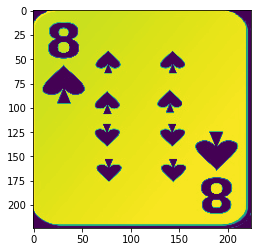

In [11]:
from skimage import io
plt.imshow(imagen_normalizada[1653])


Ejemplos de imágenes recortadas

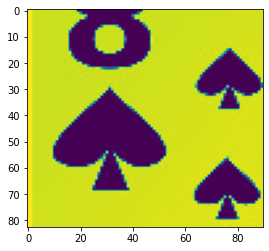

In [12]:
#io.imshow(cropped[555])
plt.imshow(cropped[1653])


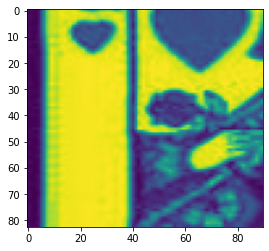

In [13]:
plt.imshow(cropped[36])

### Experimento de Cynthia

Este código de abajo es experimento mío, voy a intentar subir una imagen de cada número y que por cada imagen busque ese número y lo ponga en blanco, así en la esquina recortada solo quedaría la imagen del palo y restos y nos quitaríamos el número de encima

In [14]:
import cv2
import numpy as np

def  maintain_aspect_ratio_resize(image,  width=None,  height=None,  inter=cv2.INTER_AREA):
     dim =  None
     (h, w)  = image.shape[:2]
     if width is  None  and height is  None:
        return image

     if width is  None:
        r = height /  float(h)
        dim =  (int(w * r), height)
     else:
          r = width /  float(w)
          dim =  (width,  int(h * r))

          return cv2.resize(image, dim,  interpolation=inter)


template = cv2.imread('/content/ML_Clustering_Data/numeros/num4.jpg')
template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
template = cv2.Canny(template,  50,  200)
(tH, tW)  = template.shape[:2]
cv2_imshow(template)

original_image = cv2.imread(imagePaths[1601])
final = original_image
gray = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
found =  None

for scale in np.linspace(0.2,  1.0,  20)[::-1]:
     resized = maintain_aspect_ratio_resize(gray,  width=int(gray.shape[1]  * scale))
     r = gray.shape[1]  /  float(resized.shape[1])

     if resized.shape[0]  < tH or resized.shape[1]  < tW:
        break
     canny = cv2.Canny(resized,  50,  200)    
     detected = cv2.matchTemplate(canny, template, cv2.TM_CCOEFF)
     (_, max_val, _, max_loc)  = cv2.minMaxLoc(detected)

     
     if found is  None  or max_val > found[0]:
        found =  (max_val, max_loc, r)

(_, max_loc, r)  = found
(start_x, start_y)  =  (int(max_loc[0]  * r),  int(max_loc[1]  * r))
(end_x, end_y)  =  (int((max_loc[0]  + tW)  * r),  int((max_loc[1]  + tH)  * r))



cv2.rectangle(original_image,  (start_x, start_y),  (end_x, end_y),  (0,250,0),  2)
cv2_imshow(original_image)

cv2.rectangle(final,  (start_x, start_y),  (end_x, end_y),  (255,255,255),  -1)
cv2.imwrite('final.png', final)
cv2.waitKey(0)




error: ignored

In [ ]:
'''
io.imshow(images_entrenamiento[30])

imgg = images_entrenamiento[30]
ret,thresh = cv2.threshold(imgg,127,255,0)

## Get contours
contours,h = cv2.findContours(thresh,cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

## only draw contour that have big areas
imx = imgg.shape[0]
imy = imgg.shape[1]
lp_area = (imx * imy) / 10   '''

In [ ]:
'''
def order_points(pts):
    # initialzie a list of coordinates that will be ordered
    # such that the first entry in the list is the top-left,
    # the second entry is the top-right, the third is the
    # bottom-right, and the fourth is the bottom-left
    rect = np.zeros((4, 2), dtype = "float32")
    # the top-left point will have the smallest sum, whereas
    # the bottom-right point will have the largest sum
    s = pts.sum(axis = 1)
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]
    # now, compute the difference between the points, the
    # top-right point will have the smallest difference,
    # whereas the bottom-left will have the largest difference
    diff = np.diff(pts, axis = 1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]
    # return the ordered coordinates
    return rect


def four_point_transform(image, pts):
    # obtain a consistent order of the points and unpack them
    # individually
    rect = order_points(pts)
    (tl, tr, br, bl) = rect
    # compute the width of the new image, which will be the
    # maximum distance between bottom-right and bottom-left
    # x-coordiates or the top-right and top-left x-coordinates
    widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
    widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
    maxWidth = max(int(widthA), int(widthB))
    # compute the height of the new image, which will be the
    # maximum distance between the top-right and bottom-right
    # y-coordinates or the top-left and bottom-left y-coordinates
    heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
    heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
    maxHeight = max(int(heightA), int(heightB))
    # now that we have the dimensions of the new image, construct
    # the set of destination points to obtain a "birds eye view",
    # (i.e. top-down view) of the image, again specifying points
    # in the top-left, top-right, bottom-right, and bottom-left
    # order
    dst = np.array([
        [0, 0],
        [maxWidth - 1, 0],
        [maxWidth - 1, maxHeight - 1],
        [0, maxHeight - 1]], dtype = "float32")
    # compute the perspective transform matrix and then apply it
    M = cv2.getPerspectiveTransform(rect, dst)
    warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))
    # return the warped image
    return warped


#################################################################


## Get only rectangles given exceeding area
for cnt in contours:
    approx = cv2.approxPolyDP(cnt,0.01 * cv2.arcLength(cnt, True), True)
    ## calculate number of vertices
    #print(len(approx))


    if len(approx) == 4 and cv2.contourArea(cnt) > lp_area:
        print("rectangle")

        tmp_img = imgg.copy()
        cv2.drawContours(tmp_img, [cnt], 0, (0, 255, 255), 6)
        cv2_imshow(tmp_img)
        cv2.waitKey(0)


        tmp_img = imgg.copy()
        cv2.drawContours(tmp_img, [cnt], 0, (255, 0, 255), -1)
        cv2_imshow(tmp_img)
        cv2.waitKey(0)


        # Make a hull arround the contour and draw it on the original image
        tmp_img = imgg.copy()
        mask = np.zeros((imgg.shape[:2]), np.uint8)
        hull = cv2.convexHull(cnt)
        cv2.drawContours(mask, [hull], 0, (255, 255, 255), -1)
        cv2_imshow(mask)
        cv2.waitKey(0)


        # Draw minimum area rectangle
        tmp_img = imgg.copy()
        rect = cv2.minAreaRect(cnt)
        box = cv2.boxPoints(rect)
        box = np.int0(box)
        cv2.drawContours(tmp_img, [box], 0, (0, 0, 255), 2)
        cv2_imshow(tmp_img)
        cv2.waitKey(0)


        # Draw bounding rectangle
        tmp_img = imgg.copy()
        x, y, w, h = cv2.boundingRect(cnt)
        cv2.rectangle(tmp_img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2_imshow(tmp_img)
        cv2.waitKey(0)


        # Bounding Rectangle and Minimum Area Rectangle
        tmp_img = imgg.copy()
        rect = cv2.minAreaRect(cnt)
        box = cv2.boxPoints(rect)
        box = np.int0(box)
        cv2.drawContours(tmp_img, [box], 0, (0, 0, 255), 2)
        x, y, w, h = cv2.boundingRect(cnt)
        cv2.rectangle(tmp_img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2_imshow(tmp_img)
        cv2.waitKey(0)


        # determine the most extreme points along the contour
        # https://www.pyimagesearch.com/2016/04/11/finding-extreme-points-in-contours-with-opencv/
        tmp_img = imgg.copy()
        extLeft = tuple(cnt[cnt[:, :, 0].argmin()][0])
        extRight = tuple(cnt[cnt[:, :, 0].argmax()][0])
        extTop = tuple(cnt[cnt[:, :, 1].argmin()][0])
        extBot = tuple(cnt[cnt[:, :, 1].argmax()][0])
        cv2.drawContours(tmp_img, [cnt], -1, (0, 255, 255), 2)
        cv2.circle(tmp_img, extLeft, 8, (0, 0, 255), -1)
        cv2.circle(tmp_img, extRight, 8, (0, 255, 0), -1)
        cv2.circle(tmp_img, extTop, 8, (255, 0, 0), -1)
        cv2.circle(tmp_img, extBot, 8, (255, 255, 0), -1)


                ## Perspective Transform
        tmp_img = imgg.copy()
        pts = np.array([extLeft, extRight, extTop, extBot])
        warped = four_point_transform(tmp_img, pts)
        cv2_imshow(warped)
        cv2.waitKey(0)

'''


        cv2_imshow(tmp_img)
        cv2.waitKey(0)
        #cv2.destroyAllWindows()
'''



cv2.destroyAllWindows() '''

### Preprocesamiento de las imágenes (TEST)

In [16]:
from imutils import paths
import cv2

imagePaths = list(paths.list_images(ruta_test))
imagePaths = natsorted(imagePaths)

In [17]:
# Creamos un array para guardar los números que corresponden a las imágenes en orden alfabético
import glob, os

test_img_num = []

for file in glob.glob('/content/ML_Clustering_Data/test/*.jpg'):
    file = os.path.basename(file)
    file = file[:-4]
    test_img_num.append(file) 

test_img_num = natsorted(test_img_num)

In [18]:
from google.colab.patches import cv2_imshow

images_entrenamiento_test = []
imagen_normalizada_test = []
cropped_test = []

for imagePath in imagePaths:
    image = cv2.imread(imagePath)                               # leemos la imagen
    resized = cv2.resize(image, (224, 224))                     # le ponemos tamaño 224x224 para tenerlas toda iguales
    image=cv2.cvtColor(resized,cv2.COLOR_BGR2GRAY)              # la ponemos en grises

    norm_img = np.zeros((300, 300))                             # normalizamos la imagen
    norm_img = cv2.normalize(image, norm_img, 0, 255, cv2.NORM_MINMAX)
    imagen_normalizada_test.append(norm_img)
    cropped_test.append(norm_img[27:110, 0:90])                    # Añadimos la imagen recortada a la lista cropped

'''
    se=cv2.getStructuringElement(cv2.MORPH_RECT , (8,8))        # Con esto de abajo la ponemos prácticamente en dos tonos de colores
    bg=cv2.morphologyEx(image, cv2.MORPH_DILATE, se)
    out_gray=cv2.divide(image, bg, scale=255)
    out_binary=cv2.threshold(out_gray, 0, 255, cv2.THRESH_OTSU )[1] 
    images_entrenamiento_test.append(out_binary)                     # Añadimos la imagen procesada a la lista
    #cropped.append(out_binary[30:100, 0:90])                    # Añadimos la imagen recortada a la lista cropped
'''

'\n    se=cv2.getStructuringElement(cv2.MORPH_RECT , (8,8))        # Con esto de abajo la ponemos prácticamente en dos tonos de colores\n    bg=cv2.morphologyEx(image, cv2.MORPH_DILATE, se)\n    out_gray=cv2.divide(image, bg, scale=255)\n    out_binary=cv2.threshold(out_gray, 0, 255, cv2.THRESH_OTSU )[1] \n    images_entrenamiento_test.append(out_binary)                     # Añadimos la imagen procesada a la lista\n    #cropped.append(out_binary[30:100, 0:90])                    # Añadimos la imagen recortada a la lista cropped\n'

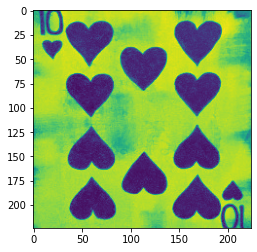

In [19]:
from skimage import io
#io.imshow(images_entrenamiento[555])

plt.imshow(imagen_normalizada_test[22])


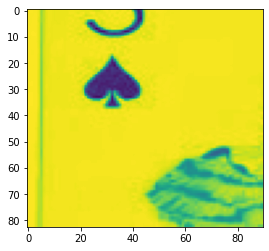

In [20]:
#io.imshow(cropped[555])

plt.imshow(cropped_test[55])


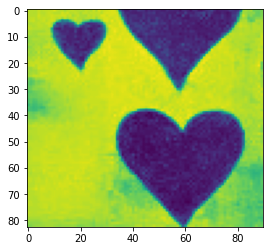

In [21]:
plt.imshow(cropped_test[22])

### Entrenamiento del modelo

Vectorización de los datos para el modelo

Consiste en reducir los datos a arrays unidimensionales para poder pasarlos como parámetro al modelo. Esto se hace mediante el método ravel visto en clase.

In [50]:
from sklearn.cluster import KMeans

km = KMeans(init="random", n_clusters=5, n_init=10, max_iter=1000, random_state=42)

cropped_flat = []
cropped_flat_test = []

for i in range(0, len(cropped)):
    img = cropped[i].ravel()
    cropped_flat.append(img)

for i in range(0, len(cropped_test)):
    img = cropped_test[i].ravel()
    cropped_flat_test.append(img)

### Pruebas con KMeans

In [51]:
kmeans_model = km.fit_transform(cropped_flat_test)
km_centroids = km.cluster_centers_
km_centroids.shape

(5, 7470)

In [52]:
y = km.predict(cropped_flat_test)

Obtenemos las métricas, principalmente centradas en la distancia entre clusters e inter-cluster.

In [53]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

CH = calinski_harabasz_score(cropped_flat_test, y)
DB = davies_bouldin_score(cropped_flat_test, y)
silhouette_avg = silhouette_score(cropped_flat_test, y)

print(silhouette_avg)
print(CH)
print(DB)

0.12597588448569602
46.824622818850834
2.1433156529423294


In [54]:
import numpy
import sys

numpy.set_printoptions(threshold=sys.maxsize)

y

array([3, 0, 3, 3, 0, 1, 1, 0, 1, 0, 2, 4, 0, 3, 1, 3, 2, 2, 0, 3, 1, 1,
       0, 2, 0, 3, 2, 2, 4, 4, 1, 2, 0, 2, 0, 4, 2, 2, 3, 3, 4, 1, 3, 1,
       2, 2, 0, 1, 1, 0, 0, 0, 0, 1, 1, 2, 4, 2, 2, 3, 4, 3, 3, 0, 3, 3,
       4, 0, 3, 0, 2, 0, 2, 1, 1, 3, 0, 3, 4, 0, 0, 0, 0, 1, 1, 3, 0, 3,
       3, 1, 3, 0, 2, 2, 2, 1, 2, 3, 3, 2, 3, 0, 4, 1, 1, 3, 0, 4, 0, 4,
       3, 1, 1, 3, 2, 3, 0, 0, 0, 3, 0, 0, 2, 4, 2, 2, 0, 4, 0, 4, 2, 0,
       0, 3, 3, 3, 2, 0, 1, 0, 4, 2, 0, 3, 0, 0, 1, 2, 2, 4, 0, 1, 3, 2,
       0, 4, 0, 2, 0, 2, 2, 4, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       0, 0, 0, 4, 2, 3, 1, 2, 3, 0, 0, 3, 4, 2, 3, 1, 3, 3, 4, 0, 1, 0,
       2, 4, 0, 2, 0, 2, 4, 1, 0, 1, 0, 0, 4, 0, 0, 1, 1, 3, 4, 3, 0, 2,
       2, 2, 2, 4, 1, 0, 0, 2, 0, 0, 0, 0, 3, 0, 2, 4, 4, 0, 2, 3, 2, 1,
       3, 2, 1, 0, 1, 1, 0, 0, 0, 2, 4, 0, 2, 2, 2, 0, 4, 0, 2, 2, 2, 3,
       2], dtype=int32)

Efectivamente, se divide en 5 clusters distintos el conjunto de datos.

In [45]:
print(np.unique(y))

[0 1 2 3 4]


Ahora, se prueba a optimizar el modelo mediante un gridsearch:

In [63]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, KFold

param_grid = {
    'random_state' : [42],
    'max_iter' : [500, 1000, 200],
    'copy_x' : [True, False],
    'algorithm' : ['lloyd', 'elkan', 'auto', 'full'],
}


gs2 = RandomizedSearchCV(estimator=km,
                             param_distributions=param_grid,
                             n_iter=5,
                             n_jobs=4,
                             verbose=1)
gs2.fit(cropped_flat)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(estimator=KMeans(init='random', max_iter=1000, n_clusters=5,
                                    random_state=42),
                   n_iter=5, n_jobs=4,
                   param_distributions={'algorithm': ['lloyd', 'elkan', 'auto',
                                                      'full'],
                                        'copy_x': [True, False],
                                        'max_iter': [500, 1000, 200],
                                        'random_state': [42]},
                   verbose=1)

In [64]:
print('Best score:', gs2.best_score_)
print('Best score:', gs2.best_params_)

Best score: -54599030422.86867
Best score: {'random_state': 42, 'max_iter': 1000, 'copy_x': True, 'algorithm': 'full'}


In [68]:
km_second = KMeans(init="random", n_clusters=5, n_init=10, random_state=42, max_iter=1000, copy_x=True, algorithm='full')
kmeans_model = km_second.fit_transform(cropped_flat_test)

km_centroids = km_second.cluster_centers_
km_centroids.shape

y = km_second.predict(cropped_flat_test)

In [69]:
silhouette_avg = silhouette_score(cropped_flat_test, y)

print(silhouette_avg)

0.12597588448569602


### Pruebas con DBSCAN

## Otros

In [46]:
import pandas as pd

submission = pd.DataFrame()
submission['id'] = test_img_num
submission['suit'] = y

submission.to_csv("submission_grupo24.csv", index=False)
from google.colab import files
files.download('submission_grupo24.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Ajustes básicos de imágenes (Escala de grises, rotar y recortar)

https://www.youtube.com/watch?v=uDNqNv2N-pY&list=PLZsOBAyNTZwYHBIlu_PUO19M7aHMgwBJr&index=19

Image segmentation

https://www.youtube.com/watch?v=6CqRnx6Ic48&list=PLZsOBAyNTZwYHBIlu_PUO19M7aHMgwBJr&index=52

Edición de imagen que hemos utilizado

https://stackoverflow.com/questions/62042172/how-to-remove-noise-in-image-opencv-python

Girar imágenes según su contorno

https://stackoverflow.com/questions/64860785/opencv-using-canny-and-shi-tomasi-to-detect-round-corners-of-a-playing-card

Más preprocesamiento de imágenes

https://www.instintoprogramador.com.mx/2020/11/tutorial-de-procesamiento-de-imagenes.html

Borrar texto de una imagen

https://dev.to/stokry/how-to-remove-an-object-from-an-image-with-python-2md9